In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
import re
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style()
%matplotlib inline
warnings.filterwarnings('ignore')

data_train = pd.read_csv("../titanic_data/train.csv")
data_test = pd.read_csv("../titanic_data/test.csv")
display(data_train.head(),data_test.head())
# 训练集字段：乘客ID、是否生存、舱位等级、姓名、性别、年龄、堂兄弟和堂兄妹个数、父母和孩子的个数、船票编码、票价、客舱、上船口岸。

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# 查看数据情况 

In [2]:
#查看数值型数据情况：
d1 = data_train.describe(percentiles=[.25,.5,.6,.65,.7,.75,.8,.95])
#查看字符型数据情况：
d2 = data_train.describe(include=['O'])
display(d1,d2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
60%,535.000000,0.000000,3.000000,31.800000,0.000000,0.000000,21.679200
65%,579.500000,1.000000,3.000000,34.000000,0.000000,0.000000,26.000000
70%,624.000000,1.000000,3.000000,36.000000,1.000000,0.000000,27.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Lam, Mr. Ali",male,1601,B96 B98,S
freq,1,577,7,4,644


In [3]:
# 查看整体数据情况
data_train.info()
print("==" * 50)
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

# 分析数据 

A: 从上面的数据得到：  
1、共有891名乘客，生存率为38%   
2、乘客年龄最小是0.42岁，最大80岁，中位数28，年龄较大者占比少  
3、75%以上的乘客没有与父母孩子同行，25%左右的乘客有一个或以上的兄弟姐妹  
4、票价平均在32，最高在512，差距较大  
5、超过一半乘客坐三等舱  
6、每个人的名字没有重复  
7、男性乘客有577人  
8、Ticket有681个不同值  
9、上船口岸最多的是S，有644人次

B：猜想：  
1.Pclass、Fare反映一个人的身份、财力情况，在危难关头，社会等级高的乘客的生存率比等级低的乘客的生存率高。  
2.在灾难发生时，人类社会的尊老爱幼、女性优先必会起作用。故老幼、女性生存率更高。  
3.有多个亲人同行的话，人多力量大，生存率可能更高些。  
4.名字、Ticket看不出能反映什么，可能会删掉。  
5.Id在记录数据中有用，在分析中没什么用，删掉。  

C:缺失数据：  
1、暴力删除  
2、利用中值或均值回补  
3、由其他已知数据进行估算

D:数据类型转换：
字符型数据都要转成数值型数据  
类别型变量：Survived、Pclass（顺序）、Sex、Embarked。数值型变量：Age、 SibSp（离散）、Parch（离散）、Fare.

## 下面将根据现在数据的类型，分数值型和字符串来讨论、研究，同时完成缺失值进行处理、根据每个变量与生存率之间的关系进行选择，必要时将删除变量或者创造出新的变量来帮助模型的构建。最终所有的数据类型都将处理为数值型

In [4]:
# 首先合并train和test，为了后续写代码能同时处理两个数据集
combination_data  = [data_train,data_test]

In [5]:
# PassengerId对预测无作用，删掉
del data_train["PassengerId"]

### 因子：Pclass 船舱分三等，某种程度上代表了乘客的身份、社会地位，下面探究一下Pclass的作用：
从下面的数据和图表得到：Pclass=1的生存率最高

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


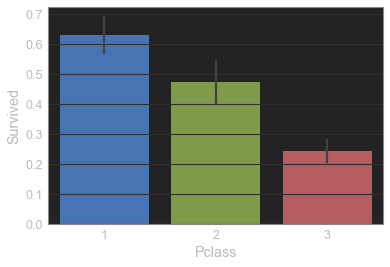

In [6]:
sns.barplot(x='Pclass',y='Survived',data=data_train)
data_train[['Pclass','Survived']].groupby('Pclass',as_index=False).mean().sort_values('Survived',ascending=False)

### 因子：分析SibSp和Parch分别对生存率的影响

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


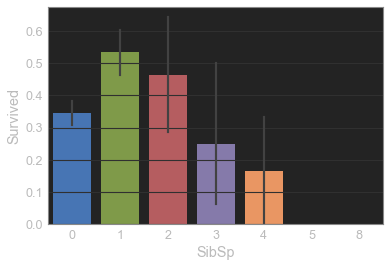

In [7]:
sns.barplot(x='SibSp',y='Survived',data=data_train)
data_train[['SibSp','Survived']].groupby('SibSp',as_index=False).mean().sort_values('Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


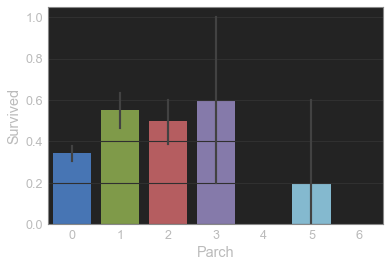

In [8]:
sns.barplot(x='Parch',y='Survived',data=data_train)
data_train[['Parch','Survived']].groupby('Parch',as_index=False).mean().sort_values('Survived',ascending=False)

### SibSp和Parch分别对生存率的影响不明显，现将两变量合起来分析

In [9]:
for dataset in combination_data:
    dataset['Family'] = dataset["SibSp"] + dataset["Parch"] + 1

,Family,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


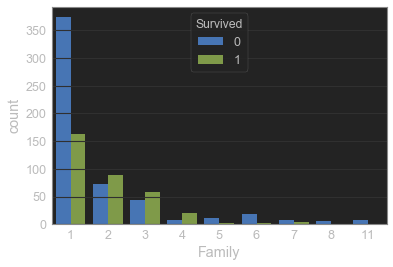

In [10]:
sns.countplot(x='Family',hue='Survived',data=data_train)
data_train[['Family','Survived']].groupby('Family',as_index=False).mean().sort_values('Survived',ascending=False)

### 创建新的特征Family_size，作为家庭大小情况：
小家庭（独自一人）为1，中家庭（2-4），大家庭（5-11）

In [11]:
for dataset in combination_data:
    dataset['Family_size'] = dataset['Family'].map(lambda x : 1 if x == 1 else 2 if 1 < x < 5 else 3)

### 创建新的特征Alone，分析陪伴是否对生存率有影响

In [12]:
for dataset in combination_data:
    dataset['Alone'] = dataset['Family'].map(lambda x : 1 if x == 1 else 0)

,Alone,Survived
0,0,0.505650
1,1,0.303538


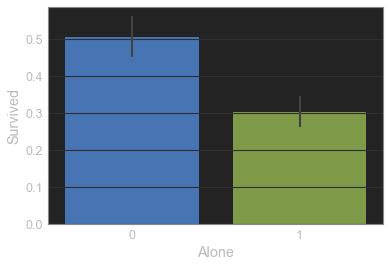

In [13]:
sns.barplot(x='Alone',y='Survived',data=data_train)
data_train[['Alone','Survived']].groupby('Alone',as_index=False).mean().sort_values('Survived',ascending=False)

In [14]:
# 删除SibSp Parch Family特征
for dataset in combination_data:
    del dataset['SibSp']
    del dataset['Parch']
    del dataset['Family']

### 因子：分析Age对生存率的影响

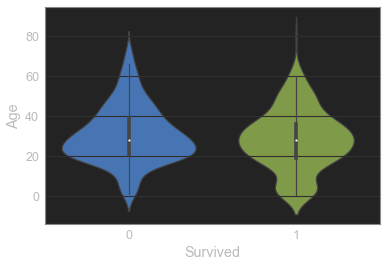

In [15]:
#查看生存与死亡乘客的年龄分布
sns.violinplot(y="Age",x='Survived',data=data_train)

从下面数据结果得到小孩子的生存率比较高

In [16]:
data_train['Age_group'] = pd.cut(data_train.Age,5)
data_train[['Age_group','Survived']].groupby('Age_group',as_index=False).mean().sort_values('Survived',ascending=False)

,Age_group,Survived
0,"(0.34, 16.336]",0.550000
3,"(48.168, 64.084]",0.434783
2,"(32.252, 48.168]",0.404255
1,"(16.336, 32.252]",0.369942
4,"(64.084, 80.0]",0.090909


In [17]:
del data_train["Age_group"]

填补Age的缺失值  
在（均值-方差，均值+方差）内随机生产age_null_count个数

In [18]:
for dataset in combination_data:
    age_null_count = dataset['Age'].isnull().sum()
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    dataset['Age'][dataset['Age'].isnull()] = np.random.randint(age_avg - age_std,age_avg + age_std,age_null_count)

将年龄进行分组(16，32，48，64)，分五组

In [19]:
for dataset in combination_data:
    dataset['Age'] = dataset['Age'].map(lambda x: 0 if x < 16 else 1 if x < 32 else 2 if x < 48 else 3 if x < 64 else 4)

### 因子：分析Fare对生存率的影响
下面的数据得出：随着票价的升高，生存率也升高

In [20]:
data_train["Fare_group"] = pd.qcut(data_train["Fare"],4)
data_train[['Fare_group','Survived']].groupby('Fare_group',as_index=False).mean().sort_values('Survived',ascending=True)

,Fare_group,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [21]:
del data_train["Fare_group"]

填补Fare的缺失值，使用中位数填补

In [22]:
data_train['Fare'].fillna(data_train['Fare'].median(),inplace=True)

将Fare进行分组（7.91, 14.454, 31.0）,分成四组

In [23]:
for dataset in combination_data:
    dataset['Fare'] = dataset['Fare'].map(lambda x: 0 if x < 7.91 else 1 if x < 14.454 else 2 if x < 31 else 3)

### 因子：分析Name对生存率的影响
(1)分析名字长度

In [24]:
for dataset in combination_data:
    dataset['The_length_of_name'] = dataset['Name'].map(lambda x: len(re.split(" ",x)))

In [25]:
data_train[['The_length_of_name','Survived']].groupby('The_length_of_name',as_index=False).mean().sort_values('Survived',ascending=False)

,The_length_of_name,Survived
6,9,1.000000
7,14,1.000000
4,7,0.842105
3,6,0.773585
5,8,0.555556
2,5,0.427083
1,4,0.340206
0,3,0.291803


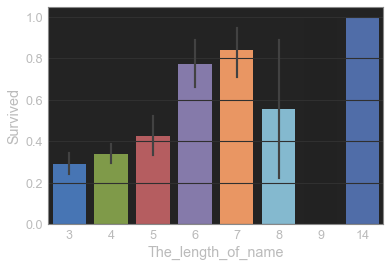

In [26]:
sns.barplot(x='The_length_of_name',y='Survived',data=data_train)

将'The_length_of_name'数据做标准化处理   
样本x的标准分数计算如下:   
z = (x - u) / s
x为样本数据，u为均值，s为标准差

In [27]:
# 训练集标准化处理
from sklearn.preprocessing import StandardScaler
Stdsca = StandardScaler()
name_length1 = Stdsca.fit_transform(data_train[["The_length_of_name"]])
name_length1 = pd.DataFrame(name_length1,columns=["name_length"])
data_train = pd.concat([data_train,name_length1],axis=1)

In [28]:
# 测试集标准化处理
name_length2 = Stdsca.fit_transform(data_test[['The_length_of_name']])
name_length2 = pd.DataFrame(name_length2,columns=["name_length"])
data_test = pd.concat([data_test,name_length2],axis=1)

In [29]:
# 联合新数据，删除The_length_of_name
combination_data = [data_train,data_test]
for dataset in combination_data:
    del dataset['The_length_of_name']

(2)分析头衔

In [30]:
# 将头衔取出当成新的一列
for dataset in combination_data:
    dataset['Title'] = dataset.Name.str.extract("([A-Za-z]+)\.",expand=False)

In [31]:
#title跟Sex有联系，联合起来分析
pd.crosstab(data_train.Title,data_train.Sex)

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [32]:
# 将Title分组，不常见的Title用'Rare'代替
for dataset in combination_data:
    dataset['Title'].replace(['Dona', 'Don', 'Rev', 'Dr', 'Major', 'Lady', 'Sir', 'Mlle',
                              'Col', 'Capt', 'Countess','Jonkheer'],'Rare',inplace=True)
    dataset['Title'].replace('Mlle','Miss',inplace=True)
    dataset['Title'].replace('Ms','Miss',inplace=True)
    dataset['Title'].replace('Mme','Mrs',inplace=True)

In [33]:
# 分析Title和生存率的关系，从结果看出男性的生存率最低
data_train[['Title','Survived']].groupby('Title',as_index=False).mean().sort_values('Survived',ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.699454
0,Master,0.575000
4,Rare,0.400000
2,Mr,0.156673


In [34]:
# 将各头衔转换为数据类型，'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master':4, 'Rare':5
for dataset in combination_data:
    dataset['Title'] = dataset['Title'].map({'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master':4, 'Rare':5})

In [35]:
# 删除原来的Name特征
for dataset in combination_data:
    del dataset['Name']

### 因子：分析Sex对生存率的影响 

In [36]:
data_train[['Sex','Survived']].groupby('Sex',as_index=False).mean().sort_values('Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


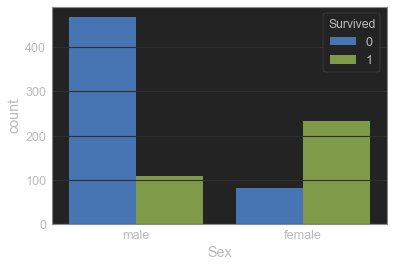

In [37]:
sns.countplot(x='Sex',hue='Survived',data=data_train)

#### 分析Pclass与Sex对生存率的影响 

In [38]:
data_train[['Pclass','Sex','Survived']].groupby(['Pclass','Sex'],as_index=False).mean().sort_values('Survived',ascending=False)

,Pclass,Sex,Survived
0,1,female,0.968085
2,2,female,0.921053
4,3,female,0.500000
1,1,male,0.368852
3,2,male,0.157407
5,3,male,0.135447


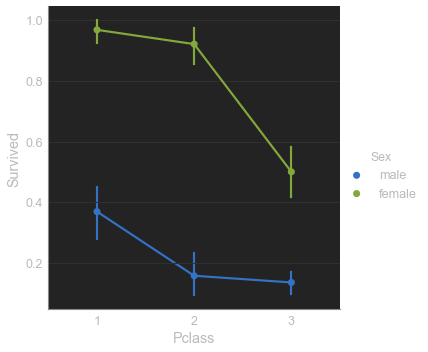

In [39]:
# 从图中看到船舱等级越高，生存率越高
sns.catplot(x='Pclass',y='Survived',hue='Sex',kind='point',data=data_train)

#### 分析Age与Sex对生存率的影响

In [40]:
data_train[['Age','Sex','Survived']].groupby(['Age','Sex'],as_index=False).mean().sort_values('Survived',ascending=False)

,Age,Sex,Survived
6,3,female,0.892857
4,2,female,0.755814
2,1,female,0.729032
0,0,female,0.666667
1,0,male,0.512195
7,3,male,0.229167
5,2,male,0.179348
3,1,male,0.147766
8,4,male,0.076923


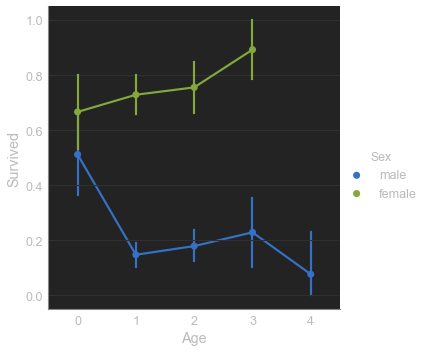

In [41]:
# 对女性来说，年龄越大生存率越高
# 对男性来说，年龄越小生存率越高
# 体现出尊老爱幼，女尊男卑的特点
sns.catplot(x='Age',y='Survived',hue='Sex',kind='point',data=data_train)

In [42]:
data_train[['Age','Sex','Survived']].groupby(['Age','Sex'],as_index=False).mean().sort_values('Survived',ascending=False)

,Age,Sex,Survived
6,3,female,0.892857
4,2,female,0.755814
2,1,female,0.729032
0,0,female,0.666667
1,0,male,0.512195
7,3,male,0.229167
5,2,male,0.179348
3,1,male,0.147766
8,4,male,0.076923


In [43]:
#将字符串类型转换成数值型，0表示男性，1表示女性
for dataset in combination_data:
    dataset['Sex'] = dataset['Sex'].map({'male':0,'female':1})

### 因子：分析Cabin对生存率的影响

In [44]:
# 新建一个特征代表Cabin是否有缺陷值
for dataset in combination_data:
    dataset['Cabin_exist'] = dataset['Cabin'].map(lambda x: 1 if type(x) == str else 0)

In [45]:
data_train[['Cabin_exist','Survived']].groupby('Cabin_exist',as_index=False).mean().sort_values('Survived',ascending=False)

,Cabin_exist,Survived
1,1,0.666667
0,0,0.299854


In [46]:
# 删除Cabin特征
for dataset in combination_data:
    del dataset['Cabin']

### 因子：分析Embarked对生存率的影响

In [47]:
# 该特征有两个缺失值，先分析不同登船口岸对生存率的影响
data_train[['Embarked','Survived']].groupby('Embarked',as_index=False).mean().sort_values('Survived',ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


#### 分析Pclass与Embarked对生存率的影响

In [48]:
data_train[['Pclass','Embarked','Survived']].groupby(['Pclass','Embarked'],as_index=False).mean().sort_values('Survived',ascending=False)

,Pclass,Embarked,Survived
0,1,C,0.694118
4,2,Q,0.666667
2,1,S,0.582677
3,2,C,0.529412
1,1,Q,0.500000
5,2,S,0.463415
6,3,C,0.378788
7,3,Q,0.375000
8,3,S,0.189802


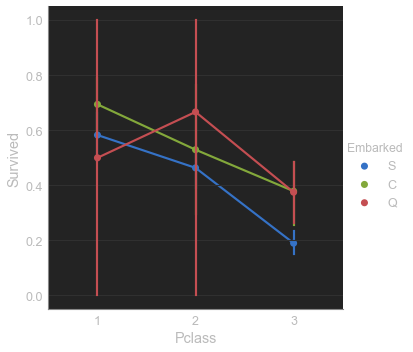

In [49]:
sns.catplot(x='Pclass',y='Survived',hue='Embarked',kind='point',data=data_train)

In [50]:
# 'S'口岸登录人数最多，用'S'填补缺失值
data_train['Embarked'].fillna('S',inplace=True)

In [51]:
#将Embarked转换成数值型数据：{"C":0,"Q":1,"S":2}
for dataset in combination_data:
    dataset['Embarked'] = dataset['Embarked'].map({"C":0,"Q":1,"S":2}).astype(int)

### 因子：分析Ticket对生存率的影响

In [52]:
data_train['Ticket'].describe()

count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object

In [53]:
# Ticket有681个重复性，直接删掉
for dataset in combination_data:
    del dataset['Ticket'] 

In [54]:
data_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_size,Alone,name_length,Title,Cabin_exist
0,0,3,0,1,0,2,2,0,-0.059474,1,0
1,1,1,1,2,3,0,2,0,2.504633,3,1
2,1,3,1,1,1,2,1,1,-0.914177,2,0
3,1,1,1,2,3,2,2,0,2.504633,3,1
4,0,3,0,2,1,2,1,1,-0.059474,1,0


## 通过计算各个特征与标签的相关系数，来选择特征

In [55]:
corr_df = data_train.corr()
corr_df

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_size,Alone,name_length,Title,Cabin_exist
Survived,1.000000,-0.338481,0.543351,-0.060738,0.296834,-0.167675,0.108631,-0.203367,0.278520,0.411444,0.316912
Pclass,-0.338481,1.000000,-0.131900,-0.300881,-0.631488,0.162098,-0.043973,0.135207,-0.222866,-0.182138,-0.725541
Sex,0.543351,-0.131900,1.000000,-0.099075,0.248156,-0.108262,0.280570,-0.303646,0.375797,0.505928,0.140391
Age,-0.060738,-0.300881,-0.099075,1.000000,0.060490,-0.034343,-0.196853,0.159550,0.053975,-0.093993,0.221553
Fare,0.296834,-0.631488,0.248156,0.060490,1.000000,-0.115253,0.555515,-0.564985,0.317164,0.344460,0.496529
Embarked,-0.167675,0.162098,-0.108262,-0.034343,-0.115253,1.000000,-0.004951,0.063532,0.032424,-0.072770,-0.160196
Family_size,0.108631,-0.043973,0.280570,-0.196853,0.555515,-0.004951,1.000000,-0.923090,0.311132,0.400122,0.088993
Alone,-0.203367,0.135207,-0.303646,0.159550,-0.564985,0.063532,-0.923090,1.000000,-0.369259,-0.396077,-0.158029
name_length,0.278520,-0.222866,0.375797,0.053975,0.317164,0.032424,0.311132,-0.369259,1.000000,0.394797,0.184484
Title,0.411444,-0.182138,0.505928,-0.093993,0.344460,-0.072770,0.400122,-0.396077,0.394797,1.000000,0.143787


查看各特征与Survived的线性相关系数

In [56]:
# 正线性相关前三为：Sex、Title、Cabin_exist；负线性相关前三：Pclass、Alone、Embarked。
corr_df['Survived'].sort_values(ascending=False)

Survived       1.000000
Sex            0.543351
Title          0.411444
Cabin_exist    0.316912
Fare           0.296834
name_length    0.278520
Family_size    0.108631
Age           -0.060738
Embarked      -0.167675
Alone         -0.203367
Pclass        -0.338481
Name: Survived, dtype: float64

用图形直观查看线性相关系数

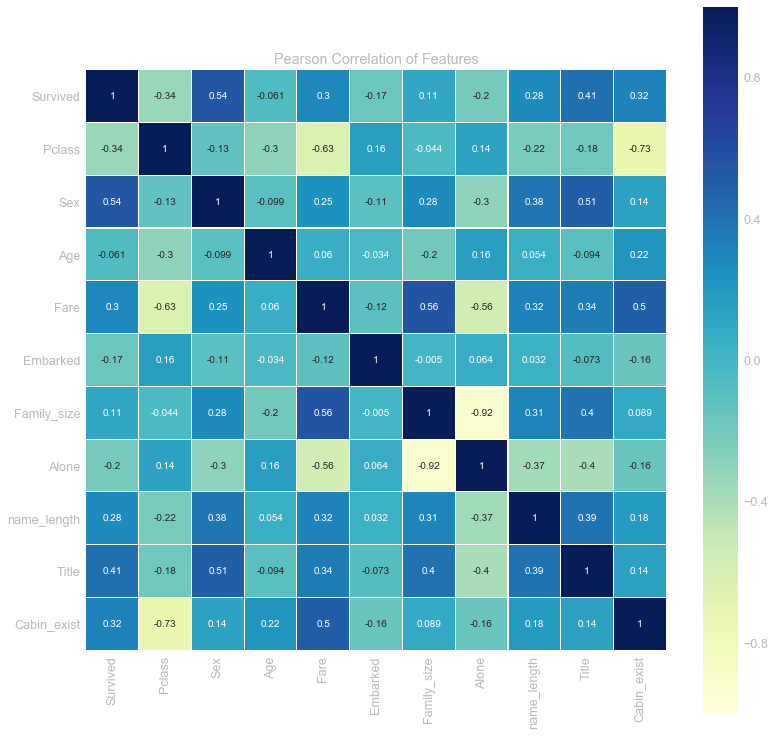

In [57]:
plt.figure(figsize=(13,13))
plt.title("Pearson Correlation of Features")
sns.heatmap(corr_df,linewidths=0.1,square=True,linecolor="white",annot=True,cmap='YlGnBu',vmin=-1,vmax=1)

In [58]:
# 删除Family_size特征
for dataset in combination_data:
    del dataset['Family_size']

In [59]:
# 查看删去Family_size的线性相关情况：
corr_df2 = data_train.corr()
corr_df2['Survived'].sort_values(ascending=False)

Survived       1.000000
Sex            0.543351
Title          0.411444
Cabin_exist    0.316912
Fare           0.296834
name_length    0.278520
Age           -0.060738
Embarked      -0.167675
Alone         -0.203367
Pclass        -0.338481
Name: Survived, dtype: float64

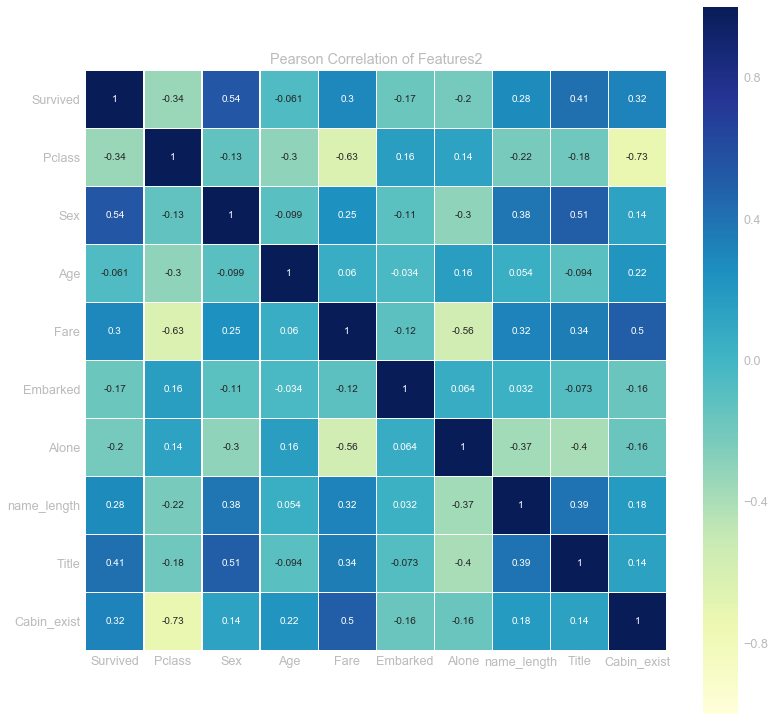

In [60]:
plt.figure(figsize=(13,13))
plt.title("Pearson Correlation of Features2")
sns.heatmap(corr_df2,linewidths=0.1,square=True,linecolor="white",annot=True,cmap='YlGnBu',vmin=-1,vmax=1)

# 模型构建与评估


## 划分训练集、训练集数据

采用 ANOVA 方差分析的 F 值来对各个特征变量打分，打分的意义是：各个特征变量对目标变量的影响权重

In [84]:
from sklearn.feature_selection import SelectKBest, f_classif,chi2
target = data_train["Survived"].values
features= ['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Alone',
        'name_length', 'Title', 'Cabin_exist']

train = data_train.copy()
test = data_test.copy()
selector = SelectKBest(f_classif, k=len(features))
selector.fit(train[features], target)
scores = -np.log10(selector.pvalues_)
indices = np.argsort(scores)[::-1]
print("Features importance :")
for f in range(len(scores)):
    print("%0.2f %s" % (scores[indices[f]],features[indices[f]]))

Features importance :
inf Survived
68.85 Sex
36.99 Title
24.60 Pclass
21.51 Cabin_exist
18.86 Fare
16.61 name_length
9.05 Alone
6.32 Embarked
1.16 Age


一般情况下，会用train_test_split来按比例划分数据集，但是Kaggle已经划分好，我们只需做预测并提交答案即可

In [ ]:
# from sklearn.model_selection import train_test_split

# X_all = train.drop(['Survived'], axis=1)
# y_all = train['Survived']

# num_test = 0.20
# X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, random_state=23)

In [61]:
x_train = data_train.drop('Survived',axis=1)
y_train = data_train['Survived']
x_test = data_test.drop('PassengerId',axis=1)

## Logistic回归

In [66]:
from sklearn.linear_model import LogisticRegression
Classifier1 = LogisticRegression()
#训练模型
Classifier1.fit(x_train,y_train)
#预测
Y1_prediction = Classifier1.predict(x_test)
#模型评估（准确率）,给定的测试数据和标签的平均精度
score_Logit = Classifier1.score(x_train,y_train)
score_Logit

0.8035914702581369

In [67]:
# 各个特征对应的系数
Classifier1.coef_

array([[-0.77729513,  2.12961266, -0.40250978, -0.07842053, -0.30408782,
         0.3117757 ,  0.15005083,  0.42523842,  0.79788847]])

In [64]:
# 导出数据 
Final = pd.DataFrame({"PassengerId":data_test['PassengerId'],"Surivied":Y1_prediction})
Final.to_csv("../titanic_data/result_logistic.csv",index=False)
Final.head()

,PassengerId,Surivied
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## KNN分类算法

In [92]:
from sklearn.neighbors import KNeighborsClassifier
Classifier2 = KNeighborsClassifier(n_neighbors=5)
Classifier2.fit(x_train,y_train)
Y2_prediction = Classifier2.predict(x_test)
score_knn = Classifier2.score(x_train,y_train)
score_knn

0.8574635241301908

In [80]:
# 导出数据
Final_knn = pd.DataFrame({"PassengerId":data_test['PassengerId'],"Surivied":Y2_prediction})
Final_knn.to_csv("../titanic_data/result_knn.csv",index=False)
Final_knn.head()

,PassengerId,Surivied
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


## 随机森林 RandomForest 模型

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

# 创建分类器
Classifier3 = RandomForestClassifier()

# 设定参数
parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

# 创建计分器，模型评价标准
acc_scorer = make_scorer(accuracy_score)

# 模型调参利器，它存在的意义就是自动调参，只要把参数输进去，就能给出最优化的结果和参数
# 但是这个方法适合于小数据集，一旦数据的量级上去了，很难得出结果
grid_obj = GridSearchCV(Classifier3, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(x_train, y_train)

Classifier3 = grid_obj.best_estimator_

Classifier3.fit(x_train, y_train)

# 预测
Y3_prediction = Classifier3.predict(x_test)
score_rf = Classifier3.score(x_train,y_train)
score_rf

0.813692480359147

In [180]:
# 导出数据
Final_rf = pd.DataFrame({"PassengerId":data_test['PassengerId'],"Surivied":Y3_prediction})
Final_rf.to_csv("../titanic_data/result_rf.csv",index=False)
Final_rf.head()

,PassengerId,Surivied
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


# 结果分析

In [181]:
# 分析三个不同模型的结果

import pandas as pd
import glob
 
df_list = []
def GetFile_columns(fname):
    df = pd.read_csv(fname)
    return df
    
df_list = [GetFile_columns(fname) for fname in glob.glob(r"../titanic_data/result*.csv")]
passengerId = df_list[0]['PassengerId']
for i in range(3):
    del df_list[i]['PassengerId']
frame = [passengerId,df_list[0],df_list[1],df_list[2]]
big_df = pd.concat(frame,axis=1,keys=['','knn','logic','rf'])
big_df.columns = ['_'.join(col).strip() for col in big_df.columns.values]

# 过滤出三种模型结果都相同的情况
big_df[(big_df['knn_Surivied'] == big_df['logic_Surivied']) & ( big_df['logic_Surivied'] == big_df['rf_Surivied'])]

,_PassengerId,knn_Surivied,logic_Surivied,rf_Surivied
0,892,0,0,0
2,894,0,0,0
3,895,0,0,0
5,897,0,0,0
6,898,1,1,1
7,899,0,0,0
8,900,1,1,1
9,901,0,0,0
10,902,0,0,0
11,903,0,0,0


In [186]:
# 过滤出三种模型结果都不相同的情况
big_df[(big_df['knn_Surivied'] != big_df['logic_Surivied']) | 
       ( big_df['logic_Surivied'] != big_df['rf_Surivied']) | 
       (big_df['knn_Surivied'] != big_df['rf_Surivied'])]

,_PassengerId,knn_Surivied,logic_Surivied,rf_Surivied
1,893,0,1,0
4,896,1,1,0
21,913,1,0,0
28,920,1,0,0
34,926,1,1,0
36,928,0,0,1
37,929,0,1,1
41,933,1,0,0
46,938,0,1,0
50,942,0,0,1
